In [2]:
# !pip install scikit-learn

### Import the necessary libraries ###

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

### Import the data and DO EDA AND CLEANING !!!!!! ###

#### 1. Cleveland Data ####

In [12]:
data = pd.read_csv('data/processed.cleveland.data', header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object

In [14]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [37]:
data.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'num'
]

data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [26]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [27]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [28]:
len(data.loc[(data['ca'] == '?')| (data['thal'] == '?')])

6

In [29]:
data.loc[(data['ca'] == '?')| (data['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalang,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [39]:
df_clean = data.loc[
          (data['ca'] != '?') & (data['thal'] != '?')]

In [40]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [32]:
len(df_clean)

297

In [33]:
df_clean['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [41]:
X = df_clean.drop('num',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [35]:
y = df_clean['num'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [42]:
X_data = pd.get_dummies(X,columns=[
    ff
])

X_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [43]:
y.unique()

array([0, 2, 1, 3, 4])

In [44]:
y[y>0] = 1
y.unique()

array([0, 1])

In [45]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

### Building the Classification Tree !!! ###

In [46]:
X_data_train, X_data_test, y_train, y_test = train_test_split(X_data, y, train_size=0.75)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_data_train,y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5757575757575758, 0.9583333333333334, 'ca <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [120, 102]\nclass = No HD'),
 Text(0.3282828282828283, 0.875, 'thal_7.0 <= 0.5\ngini = 0.362\nsamples = 135\nvalue = [103, 32]\nclass = No HD'),
 Text(0.23232323232323232, 0.7916666666666666, 'trestbps <= 157.0\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(0.1919191919191919, 0.7083333333333334, 'thalach <= 93.0\ngini = 0.148\nsamples = 87\nvalue = [80, 7]\nclass = No HD'),
 Text(0.1717171717171717, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = HD'),
 Text(0.21212121212121213, 0.625, 'oldpeak <= 3.55\ngini = 0.13\nsamples = 86\nvalue = [80, 6]\nclass = No HD'),
 Text(0.1919191919191919, 0.5416666666666666, 'chol <= 327.5\ngini = 0.111\nsamples = 85\nvalue = [80, 5]\nclass = No HD'),
 Text(0.1414141414141414, 0.4583333333333333, 'oldpeak <= 1.7\ngini = 0.072\nsamples = 80\nvalue = [77, 3]\nclass = No HD'),
 Text(0.10101010101010101, 0.375, 'thalach <= 152.5\n

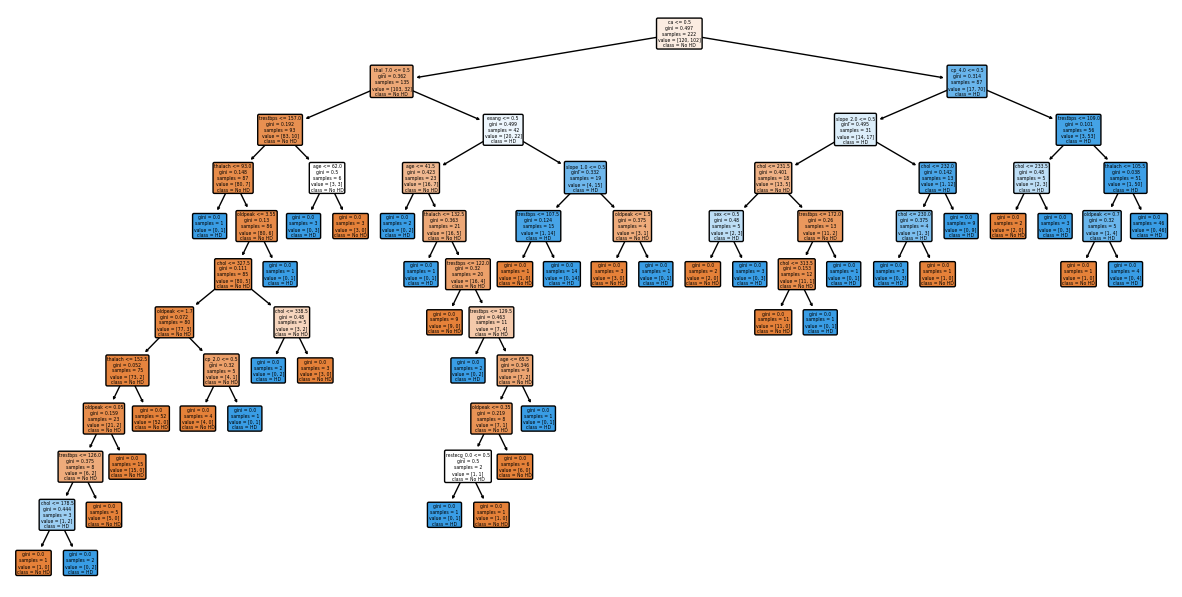

In [48]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         rounded=True,
         filled=True,
         class_names=['No HD', 'HD'],
         feature_names=X_data.columns)

### Confusion Matrix ###

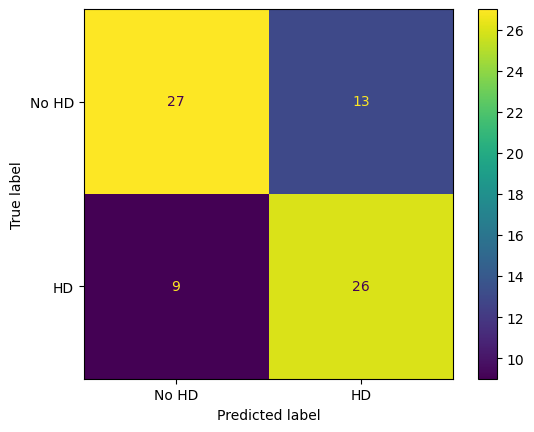

In [49]:
ConfusionMatrixDisplay.from_estimator(
    clf_dt,
    X_data_test,
    y_test,
    display_labels=['No HD', 'HD']
)

### Tackling Overfitting by Pruning !!!! ###

In [61]:
path = clf_dt.cost_complexity_pruning_path(X_data_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
# print(ccp_alphas)
clf_trees = []

for ccp_alpha in ccp_alphas:
    clf_dt_new = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt_new.fit(X_data_train,y_train)
    clf_trees.append(clf_dt_new)

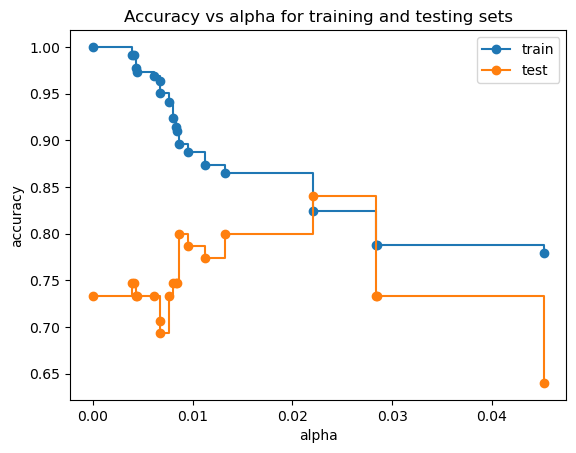

In [54]:
train_scores = [clf_dt_new.score(X_data_train,y_train) for clf_dt_new in clf_trees]
test_scores = [clf_dt_new.score(X_data_test,y_test) for clf_dt_new in clf_trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Cross Validating the CCP Alpha with the data ###

<Axes: xlabel='tree'>

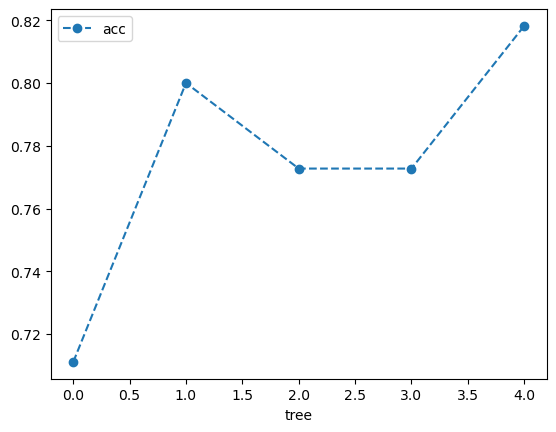

In [58]:
clf_dt_val = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)
scores = cross_val_score(clf_dt_val, X_data_train, y_train, cv=5)

cross_val_df = pd.DataFrame(data={'tree':range(5),'acc':scores})
cross_val_df.plot(x='tree',y='acc', marker='o',linestyle='--')

### Cross Validating around all the CCP Alphas and trying to find the best CCP Alpha ###

<Axes: xlabel='alpha'>

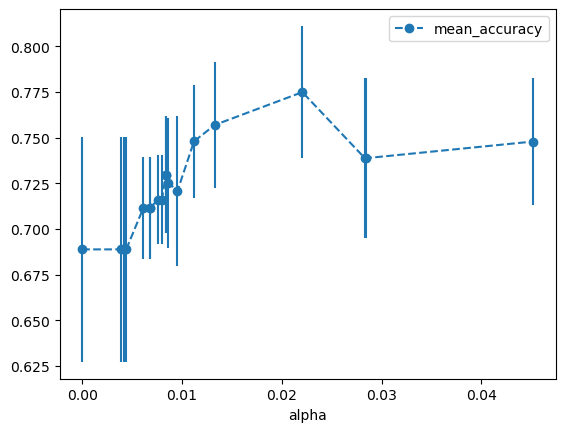

In [59]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt_val = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt_val, X_data_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [62]:
alpha_results[(alpha_results['alpha']>0.02)&(alpha_results['alpha']<0.03)]

,alpha,mean_accuracy,std
16,0.022061,0.774949,0.036282
17,0.028317,0.738788,0.043725
18,0.028482,0.738788,0.043725


In [63]:
ideal_ccp_alpha = 0.022061
ideal_ccp_alpha = float(ideal_ccp_alpha)

### Final Showdown Begins !!! Evaluating and final conclusions ###

In [64]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_data_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.022061, random_state=42)

[Text(0.5, 0.875, 'ca <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [120, 102]\nclass = No HD'),
 Text(0.25, 0.625, 'thal_7.0 <= 0.5\ngini = 0.362\nsamples = 135\nvalue = [103, 32]\nclass = No HD'),
 Text(0.125, 0.375, 'gini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No HD'),
 Text(0.375, 0.375, 'gini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = HD'),
 Text(0.75, 0.625, 'cp_4.0 <= 0.5\ngini = 0.314\nsamples = 87\nvalue = [17, 70]\nclass = HD'),
 Text(0.625, 0.375, 'slope_2.0 <= 0.5\ngini = 0.495\nsamples = 31\nvalue = [14, 17]\nclass = HD'),
 Text(0.5, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(0.75, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = HD'),
 Text(0.875, 0.375, 'gini = 0.101\nsamples = 56\nvalue = [3, 53]\nclass = HD')]

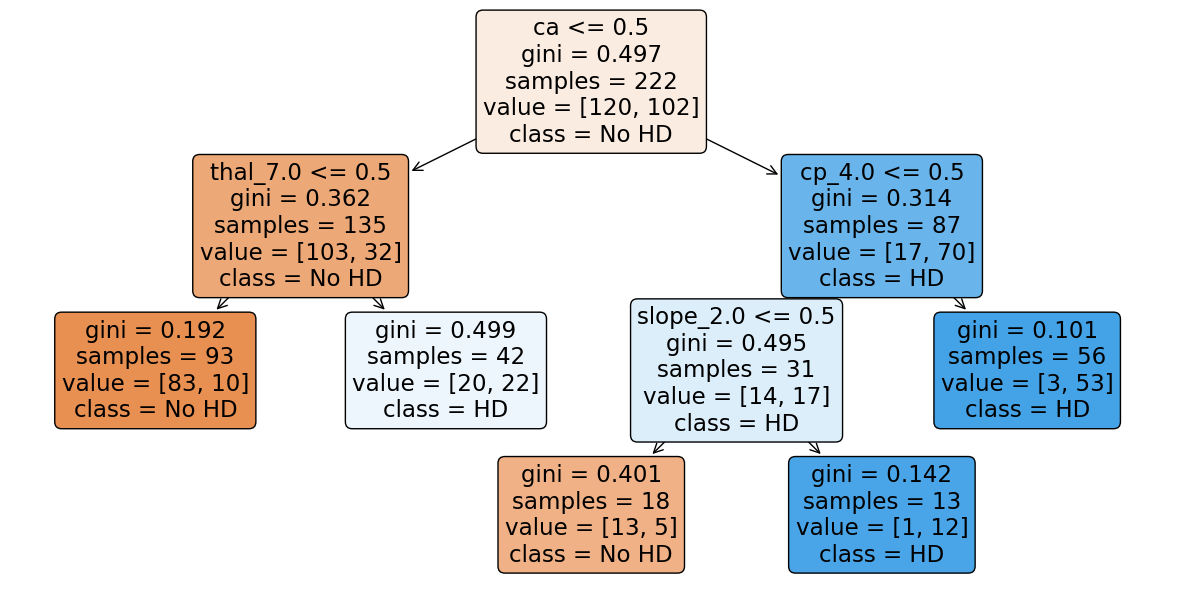

In [65]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         rounded=True,
         filled=True,
         class_names=['No HD', 'HD'],
         feature_names=X_data.columns)

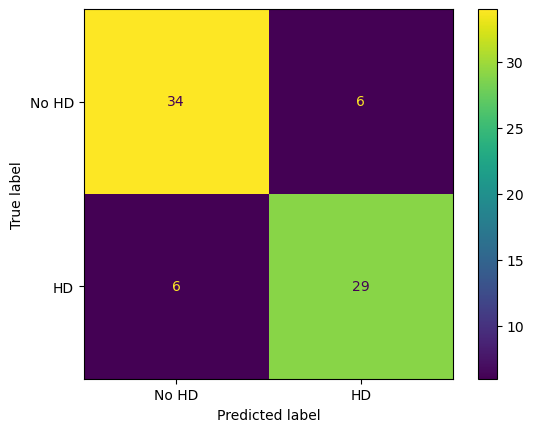

In [66]:
ConfusionMatrixDisplay.from_estimator(
    clf_dt_pruned,
    X_data_test,
    y_test,
    display_labels=['No HD', 'HD']
)